In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [2]:
#Przygotowanie danych do backtestingu
pre = pd.read_csv("C:/Users/DAMIANEK/Desktop/Studia/copper.csv")
pre

,Close/Last,Volume,Open,High,Low
0,4.1065,98124,4.1285,4.1955,4.0950
1,4.1240,88437,4.0700,4.1430,4.0535
2,4.0810,88325,4.0295,4.0880,3.9840
3,4.0195,81243,3.9870,4.0540,3.9780
4,3.9765,53745,4.0180,4.0395,3.9630
...,...,...,...,...,...
1255,3.1555,33960,3.1490,3.1685,3.1275
1256,3.1540,37634,3.1835,3.2180,3.1350
1257,3.1815,51721,3.1100,3.2015,3.0995
1258,3.0795,88784,3.0835,3.1020,3.0545


In [3]:
pre1 = pre.to_numpy()
pre1

array([[4.10650e+00, 9.81240e+04, 4.12850e+00, 4.19550e+00, 4.09500e+00],
       [4.12400e+00, 8.84370e+04, 4.07000e+00, 4.14300e+00, 4.05350e+00],
       [4.08100e+00, 8.83250e+04, 4.02950e+00, 4.08800e+00, 3.98400e+00],
       ...,
       [3.18150e+00, 5.17210e+04, 3.11000e+00, 3.20150e+00, 3.09950e+00],
       [3.07950e+00, 8.87840e+04, 3.08350e+00, 3.10200e+00, 3.05450e+00],
       [3.09550e+00, 1.03418e+05, 3.06450e+00, 3.11700e+00, 3.04400e+00]])

In [4]:
data = []
for i in range(1260):
    data.append(pre1[i][2])
data

[4.1285,
 4.07,
 4.0295,
 3.987,
 4.018,
 3.9825,
 3.9739999999999998,
 4.053,
 4.091,
 4.112,
 4.0815,
 4.0765,
 4.0969999999999995,
 4.075,
 4.1015,
 4.043,
 4.0015,
 3.9555,
 3.9085,
 3.8765,
 3.8835,
 4.005,
 4.042,
 4.0075,
 4.007,
 4.027,
 3.9675,
 4.075,
 4.065,
 4.0745,
 4.1685,
 4.0745,
 4.01,
 3.96,
 4.0525,
 4.169,
 4.195,
 4.1215,
 4.11,
 4.0355,
 4.0875,
 4.059,
 4.0185,
 4.0745,
 4.0475,
 4.07,
 4.038,
 4.0415,
 4.091,
 4.1815,
 4.2235,
 4.1845,
 4.23,
 4.282,
 4.2645,
 4.2645,
 4.2589999999999995,
 4.2795,
 4.245,
 4.2265,
 4.2335,
 4.2105,
 4.173,
 4.1755,
 4.08,
 4.012,
 3.9235,
 3.8255,
 3.7405,
 3.7710000000000004,
 3.8355,
 3.8285,
 3.835,
 3.8489999999999998,
 3.84,
 3.7645,
 3.818,
 3.807,
 3.761,
 3.7695,
 3.7760000000000002,
 3.8635,
 3.8455,
 3.8080000000000003,
 3.8595,
 3.8815,
 3.8435,
 3.821,
 3.7915,
 3.853,
 3.7975,
 3.782,
 3.6439999999999997,
 3.6015,
 3.6,
 3.6435,
 3.623,
 3.5835,
 3.65,
 3.6919999999999997,
 3.7569999999999997,
 3.8110000000000004,
 

In [18]:
data_rvs = data[::-1]
data_rvs

[3.0645,
 3.0835,
 3.11,
 3.1835,
 3.1489999999999996,
 3.1519999999999997,
 3.1255,
 3.1555,
 3.153,
 3.14,
 3.072,
 3.0705,
 3.051,
 3.0635,
 3.0915,
 3.085,
 3.0735,
 3.0685,
 3.0610000000000004,
 3.1095,
 3.111,
 3.088,
 3.0605,
 3.0780000000000003,
 3.0835,
 3.065,
 3.1005,
 3.122,
 3.069,
 3.0810000000000004,
 3.068,
 3.055,
 3.0715,
 3.063,
 3.0980000000000003,
 3.138,
 3.2119999999999997,
 3.2675,
 3.265,
 3.2995,
 3.2525,
 3.2455,
 3.2560000000000002,
 3.201,
 3.136,
 3.1465,
 3.06,
 3.0589999999999997,
 3.049,
 3.065,
 3.0075,
 3.02,
 2.998,
 2.97,
 2.9695,
 2.935,
 2.863,
 2.8305,
 2.8235,
 2.87,
 2.83,
 2.7505,
 2.7760000000000002,
 2.7735,
 2.7655,
 2.7445,
 2.7655,
 2.7175,
 2.7485,
 2.742,
 2.804,
 2.842,
 2.8075,
 2.8035,
 2.795,
 2.8255,
 2.73,
 2.7265,
 2.74,
 2.7255,
 2.753,
 2.7555,
 2.764,
 2.7385,
 2.681,
 2.685,
 2.583,
 2.6060000000000003,
 2.6765,
 2.682,
 2.7039999999999997,
 2.6875,
 2.668,
 2.7230000000000003,
 2.74,
 2.7445,
 2.7310000000000003,
 2.6675,
 2

In [19]:
#Backtesting dla cen miedzi - kwantyle
def copper_backtesting(alpha):
    def testing(a, alpha):
        X = data_rvs[a:629+a]
        r = data_rvs[630+a]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        if k < r:
            j = 0
        return j
    counts = []
    i = 0
    while i <= 629:
        value = testing(i, alpha)
        counts.append(value)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    print("Backtesting dla alpha = " + str(alpha))
    print("Teoretyczna wartość oczekiwana: " + str(alpha))
    print("Rzeczywista wartość oczekiwana: " + str(EX))
    print("Teoretyczna wariancja: " + str(alpha * (1-alpha)))
    print("Rzeczywista wariancja: " + str(VarX))
    
def copper_backtesting_num(alpha):
    counts = []
    i = 0
    while i <= 629:
        X = data_rvs[i:629+i]
        r = data_rvs[630+i]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        elif k < r:
            j = 0
        else:
            pass
        counts.append(j)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    return [EX, VarX]

In [20]:
copper_backtesting(0.001)

Backtesting dla alpha = 0.001
Teoretyczna wartość oczekiwana: 0.001
Rzeczywista wartość oczekiwana: 0
Teoretyczna wariancja: 0.000999
Rzeczywista wariancja: 0


In [21]:
X = np.linspace(0,1,1000)
X1, X2 = [], []
for x in X:
    X1.append(copper_backtesting_num(x)[0])
    X2.append(copper_backtesting_num(x)[1])

In [22]:
Y = []
for x in X:
    Y.append(x * (1-x))

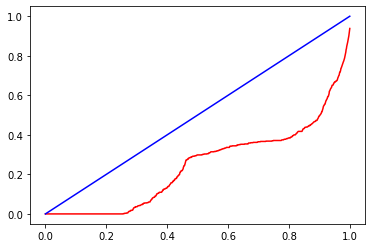

In [23]:
plt.plot(X,X1,color="r")
plt.plot(X,X,color="b")
plt.show()

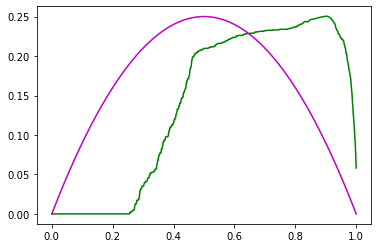

In [24]:
plt.plot(X,X2,color="g")
plt.plot(X,Y,color="m")
plt.show()

In [30]:
def copper_backtesting_02(alpha):
    counts = []
    i = 0
    while i <= 1131:
        X = data_rvs[i:126+i]
        r = data_rvs[127+i]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        elif k < r:
            j = 0
        else:
            pass
        counts.append(j)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    return [EX, VarX]

In [31]:
x1, x2 = [], []
for x in X:
    x1.append(copper_backtesting_02(x)[0])
    x2.append(copper_backtesting_02(x)[1])

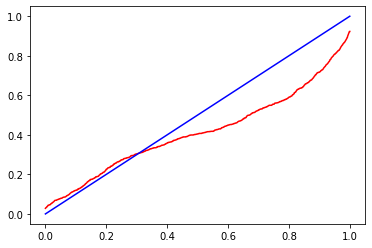

In [32]:
plt.plot(X,x1,color="r")
plt.plot(X,X,color="b")
plt.show()

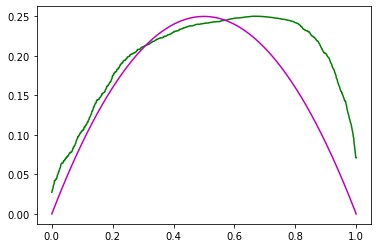

In [33]:
plt.plot(X,x2,color="g")
plt.plot(X,Y,color="m")
plt.show()

[0.30742049469964666, 0.2131013862462626]